# Car Accident Severity Capstone Projet (Week 1)

## Table of contents
* [Introduction: Description of the Problem](#introduction)
* [Data](#data)
    * [Undertanding the Data](#undertanding)
    * [Evolution of the Accidents in Time](#evolution)
    * [Density of Car Accidents by Districts](#density)
    * [Cleaning Data](#cleaning)
* [Methodology](#methodology)
    * [Visualisation of Clusters Based on Location](#visualisation)
    * [Converting Categorical Features into Numerical Values](#converting)

## Introduction: Description of the Problem <a name="introduction"></a>

In this project a model to predict the **probability** of having a **severe car accident** taking into account the conditions of the road will be build up. In order to do so, the city of **Seattle** will be used as an **example**. A database containing information about car accidents in Seattle will be used to feed the model.

The **stakeholders** of this project will be **drivers** using their vehicles in Seattle and its surroundings. Of course, this project may also interest app developers which may use this example an extrapolate it to other cities and/or states.

The main idea behind this project is quite simple: "**_forcasting car accidents is the best way to avoid them_**".

In [1]:
# The first thing we need to do is importing two of the most important libraries 
# required in almost every data science project: "Pandas and Numpy"

import pandas as pd
import numpy as np

## Data <a name="data"></a>

The data that will be used in this project comes from the **_Traffic Management Division of Seattle_**. A raw database in a form of a **CSV file** will be downloaded from: "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv". This **database contains** precious information about all registered **car accidents in Seattle from 2004 to Present**.

In [2]:
# Uncomment the line below in order to download the database.
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
csv_file = "Data-Collisions.csv"
df = pd.read_csv(csv_file, low_memory=False)

--2020-09-28 06:46:55--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70,49M  11,2MB/s    in 8,3s    

2020-09-28 06:47:05 (8,53 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



### Undertanding the Data <a name="understanding"></a>

In [3]:
df.shape

(194673, 38)

The raw database comes as a **CSV file** containing **194673** entries (car accidents in Seattle) and **38** attributes with several redundant data (columns) that will not be used to build the model. The target of our model will be the "**severity**" of the possible car accident. 

In [4]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [5]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [6]:
df['SEVERITYCODE.1'].value_counts().to_frame() # The "SEVERITYCODE" and "SEVERITYCODE.1" columns contain the same
                                               # information in the from of a numerical code: 1) for property damage
                                               # and 2) for human injury.

,SEVERITYCODE.1
1,136485
2,58188


The problem has been already simplified, the raw database has only **two different values to describe the severity**:

   **1) Property Damage Only Collision** 136485 accidents representing _ca_. 70% of the data.
   
   **2) Injury Collision** 58188 accidents representing _ca_. 30% of the data.

The dataset includes the following fields:

In [7]:
df.dtypes.to_frame()

,0
SEVERITYCODE,int64
X,float64
Y,float64
OBJECTID,int64
INCKEY,int64
COLDETKEY,int64
REPORTNO,object
STATUS,object
ADDRTYPE,object
INTKEY,float64


Only few of the database attributes (columns) are relevant for the prediction of the probability of having an accident and the severity of it, namely:

* the condition of the road during the accident (**ROADCOND** attribute)
* the weather conditions during the time of the accident (**WEATHER** attribute)
* the light conditions during the accident (**LIGHTCOND** attribute)
* category of junction at which the accident took place (**ADDRTYPE** attribute)
* longitude (**X** attribute)
* latitude (**Y** latitude)

As a starting point, the attributes above will be used as main independent variables to build up our predicting model. Other parameters such as the **time of the accident** (**INCDTTM**) may also be included in future models in order to explore possible improvements. 

During the dataset preparation and cleaning, in order to remove possible biases in our model some of the entries containing positive (**true**) parameters such as **inattention** (**INATTENTIONIND** attribute), **speeding** (**SPEEDING** attribute) or **drug influence** (**UNDERINFL** attribute) will be removed.

### Evolution of the Car Accidents in Time <a name="evolution"></a>

One of the first things that we need to verify is the evolution of accidents in time. In principle, over the years the quality of the streets, roads and even the cars themself may have improved, thus, driving might have become safer and less accident may have happended in the last years. We can verify this hypothesis looking at the trend of car accidents in the last few years with a horizontal bar chart.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

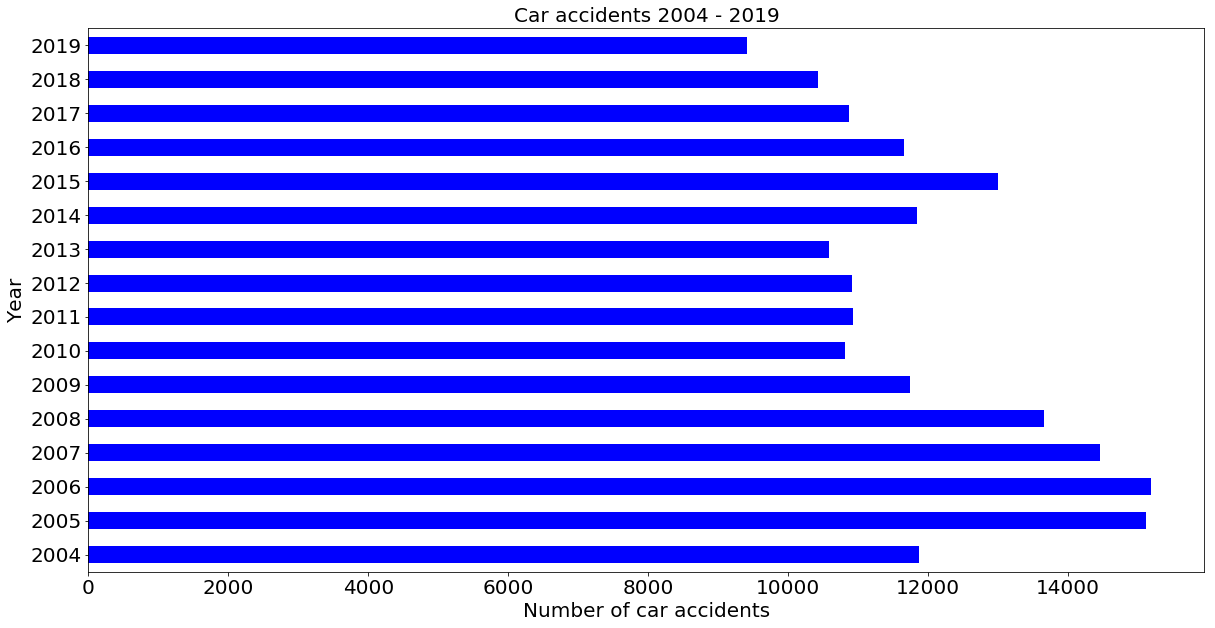

In [4]:
years = [] ; total_num = []
for x in range(2004, 2020):
    years.append(x)
    total=df['INCDATE'].str.count(str(x)).sum()
    total_num.append(total)

plot_barh = pd.DataFrame(years, total_num)

plot_barh = pd.DataFrame(total_num, years)
plot_barh.plot(kind='barh', figsize=(20,10), color='blue', fontsize=20, legend=False)
plt.xlabel('Number of car accidents', fontsize=20)
plt.ylabel('Year', fontsize=20)
plt.title('Car accidents 2004 - 2019', fontsize=20)
plt.show()

As it can be observed in the horizontal bar chart above, the car accidents have decreased in the last decade. However, this decreasing trend might not be significant enough to discard the entries from the 2000's decade, thus, all the years will be taken into account in order to construct the predicting severity model.

### Density of Car Accidents by Districts <a name="density"></a>

Another important trend that can be explored is the density of car accidents in each district. In order to do so, the first thing that needs to be done is a transformation of latitude and longitude coordinates into zipcodes. To transform the latitude and longitude coordinates the GeoPy client (https://github.com/geopy/geopy) will be used.

In [10]:
#!conda update -n base -c defaults conda --yes
#!conda install geopy -c conda-forge --yes # Uncomment this line in order to install geopy if necessary

In [11]:
import geopy

# function that will return the zipcode given the latitude and longitude
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']

geolocator = geopy.Nominatim(user_agent="http")

In [5]:
#df_model1 is a dataframe that contains all the features discussed in the section "Understanding the Data"
df_model1 = df[['X', 'Y', 'ROADCOND', 'WEATHER', 'LIGHTCOND', 'ADDRTYPE', 'SEVERITYCODE']]

At this point only the X and Y attributes will be used. However, some precautions need to be made, we need to verify if there are some instances with blank data and in this case we need to delete them in order to make the transforming function ("get_zipcode") work properly.

In [13]:
df_model1.shape

(194673, 7)

In [14]:
df_model1['X'].isnull().sum()

5334

In [15]:
df_model1['Y'].isnull().sum()

5334

Indeed, after verification we find that **5334** entries have no latitude and longitude coordinates. Thus we need to remove them from the dataset that will be used to construct the model.

In [6]:
df_model1 = df_model1[pd.notnull(df_model1['X'])]
df_model1 = df_model1.reset_index(drop=True)
df_model1.shape

(189339, 7)

Only a small part of the dataset (**the first three hundred entries**) **will be used** in order **to analyze the density of car accidents** in each districts (represented by the zipcodes), since the get_zipcode function needs to make calls to external APIs for each pair of coordinates. Thus, in order to transform the whole dataset into zipcodes the required time would be several days.

In [33]:
df_model_aux = df_model1[:300]

In [34]:
zip_codes = df_model_aux.apply(get_zipcode, axis=1, geolocator=geolocator, lon_field='X', lat_field='Y')

In [35]:
df_zipcodes = pd.DataFrame(zip_codes, columns=["Zipcode"])

In [36]:
df_zipcodes['Zipcode'].value_counts().to_frame()

,Zipcode
98122,22
98115,20
98144,20
98106,18
98103,17
98109,16
98108,15
98118,14
98134,14
98121,14


In [44]:
df_zip_coor = pd.concat([df_model_aux["X"], df_model_aux["Y"], df_zipcodes["Zipcode"]], axis=1)
df_zip_coor.shape

(300, 3)

In [45]:
df_zip_coor['Zipcode'].replace('98106-1499', np.nan, inplace=True)
df_zip_coor['Zipcode'].replace('98133-6124', np.nan, inplace=True)
df_zip_coor['Zipcode'].replace('98109-5210', np.nan, inplace=True)

df_zip_coor = df_zip_coor[pd.notnull(df_zip_coor['Zipcode'])]
df_zip_coor = df_zip_coor.reset_index(drop=True)
df_zip_coor.shape

(296, 3)

In [99]:
df_zip_coor['Zipcode'].value_counts().to_frame().shape

(34, 1)

After examining the results of the "get_zipcodes" function, only 4 entries had to be removed since the zipcodes found: 98106-1499, 98133-6124 and 98109-5210 had more than 5 digits. The 296 remaining instances of car accidents in Seattle are represented in the following Map.

In [49]:
!conda install folium -c conda-forge --yes # UNCOMMENT TO INTALL/REINSTALL FOLIUM IF NECESSARY

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    branca:          0.4.1-py_0        conda-forge
    folium:          

In [14]:
import folium

In [51]:
limit = 300
df_zip_coor = df_zip_coor.iloc[0:limit, :]
latitude = 47.59
longitude = -122.33


seattle_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# display the map of Seattle
seattle_map

# instantiate a feature group for the accidents in the dataframe
accidents = folium.map.FeatureGroup()

# loop through all the accidents and add them to the accidents feature group
for lat, lng, in zip(df_zip_coor.Y, df_zip_coor.X):
    accidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, # defines how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
seattle_map.add_child(accidents)

In order to represent the 296 car accidents in the map, the Folium Python library has been used.

In [126]:
zip_codes = ['98122', '98144', '98115','98106', '98103','98109', '98108', '98134', '98121', '98118', '98125', '98105', '98116', '98104', '98117', '98112', '98101', '98107', '98133', '98102', '98126', '98191', '98165', '98015', '98155', '98177', '98199', '98174' , '98136', '98119', '98181','98146','98113','98161']

In [127]:
seattle_data = []
for i in zip_codes:
    total = df_zip_coor['Zipcode'].value_counts()[i].sum()
    seattle_data.append([i, total])
    
df_zip_aux = pd.DataFrame(seattle_data, columns = ['Zipcodes', 'Count'])
df_zip_aux

,Zipcodes,Count
0,98122,22
1,98144,20
2,98115,20
3,98106,18
4,98103,17
5,98109,16
6,98108,15
7,98134,14
8,98121,14
9,98118,14


In [128]:
df_zip_aux.rename(columns={'Zipcodes':'ZCTA5CE10'}, inplace=True)

In [130]:
latitude = 47.59
longitude = -122.33

#seattle_geo = r'https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/zip-codes.geojson'
!wget -O seattle_zipcodes.geojson https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/zip-codes.geojson
seattle_geo = r'seattle_zipcodes.geojson'
#df_zip_aux.rename(columns={'Zipcodes':'Feature'}, inplace=True)
seattle_map2 = folium.Map(location=[latitude, longitude], zoom_start=11)
seattle_map2.choropleth(geo_data=seattle_geo, data=df_zip_aux, columns=['ZCTA5CE10', 'Count'], key_on='feature.properties.ZCTA5CE10', fill_color = 'YlOrRd', fill_opacity=0.7, line_opacity=0.2, legend_name='Density of Car Accidents in Seattle')
seattle_map2


--2020-09-21 02:34:30--  https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/zip-codes.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49044 (48K) [text/plain]
Saving to: ‘seattle_zipcodes.geojson’

100%[======================================>] 49,044      --.-K/s   in 0.004s  

2020-09-21 02:34:30 (10.7 MB/s) - ‘seattle_zipcodes.geojson’ saved [49044/49044]



When representing the density of car accidents by “districts” (the Map above) it can be seen that most of the accidents have happened in the east-center part of the city and one of the north-east districts.

Nevertheless, comparing both images (Figures 4 and 5), one can clearly see that the zipcodes might not be the best way of representing the car accident densities in the maps, thus, a clustering method will be investigated.

### Cleaning Data <a name="cleaning"></a>

Now the data needs to be cleaned before been used to build up our model. All the entries containing “Unknown”, “Other” and/or empty will be erased from the dataset that will be used to build the model. Only the attributes that are interesting for the study (**ROADCOND**, **WEATHER**, **LIGHTCOND**, **ADDRTYPE**) will be checked and treated.

In [7]:
# In the "ROADCOND" attribute (column) all the "Other" and "Unknown" strings found are replaced by numpy NANs
# and then all the entries (full rows) containing numpy NANs are erased from the dataset.
df_model1['ROADCOND'].replace('Other', np.nan, inplace=True)
df_model1['ROADCOND'].replace('Unknown', np.nan, inplace=True)
df_model1 = df_model1[pd.notnull(df_model1['ROADCOND'])]
df_model1 = df_model1.reset_index(drop=True)

# In the "WEATHER" attribute (column) all the "Other" and "Unknown" strings found are replaced by numpy NANs
# and then all the entries (full rows) containing numpy NANs are erased from the dataset.
df_model1['WEATHER'].replace('Other', np.nan, inplace=True)
df_model1['WEATHER'].replace('Unknown', np.nan, inplace=True)
df_model1 = df_model1[pd.notnull(df_model1['WEATHER'])]
df_model1 = df_model1.reset_index(drop=True)

# In the "LIGHTCOND" attribute (column) all the "Other", "Unknown" and "Dark - Unknown Lighting" strings found are replaced by numpy NANs
# and then all the entries (full rows) containing numpy NANs are erased from the dataset.
df_model1['LIGHTCOND'].replace('Other', np.nan, inplace=True)
df_model1['LIGHTCOND'].replace('Unknown', np.nan, inplace=True)
df_model1['LIGHTCOND'].replace('Dark - Unknown Lighting', np.nan, inplace=True)
df_model1 = df_model1[pd.notnull(df_model1['LIGHTCOND'])]
df_model1 = df_model1.reset_index(drop=True)

# All the entries containing empty cells in the "ADDRTYPE" attribute (column) are erased from the dataset.
df_model1 = df_model1[pd.notnull(df_model1['ADDRTYPE'])]
df_model1 = df_model1.reset_index(drop=True)

df_model1.shape

(166209, 7)

## Methodology <a name="methodoloby"></a>

In order to predict the severity of a possible car accident in the city of Seattle four different supervised machine learning algorithms will be used to build our model:

1) **Support Vector Machine**,

2) **Decision Tree**,

3) **K Nearest Neighbor** and

4) **Logistic Regression**


The advantage of the latter machine learning algorithm (***Logistic Regression***) is that it can predict not only a **categorical dependent variable** (the severity of a car accident in this project) but also its **probability**.

All the models will be trained and tested in order to evaluate their performance and to determine which model is the best one.

As seen in the “[***Density of Car Accidents by Districts***](#density)” section, transforming the coordinates into zipcodes to represent the car accident densities may introduced some biased information in our dataset. In order to include meaningful information about the “position” of the car accidents, the unsupervised machine learning algorithm known as "**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** can be used. This algorithm developed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996 is one of the most common clustering algorithms which works based on the density of the object. The main idea behind this unsupervised algorithm is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster. In principle, clusters based on the “real” car accident densities instead of the zipcodes will be drawn. 

Concerning the location of the accidents a hypothesis is made: 

“Though including the “position” of the car accidents into the model may seem an obvious and necessary choice, the **ADDRTYPE** attribute may already contain enough information about the road and thus the “location” of the accident. Therefore, the “position” of the accidents may be redundant and useless information.”

In order to verify this hypothesis all the models will be built up with and without the “position” information.

## Analysis<a name="analysis"></a>

In order to have a better idea of the car accident densities in a real map, let's superimpose the locations (latitude and longitude). This procedure can be done by different methods such as the use of the **Basemap** package that can be used together with the library **Matplotlib** or directly with the **Folium** library as previously done. This time the full cleaned dataset will be used (not only the first 300 instances). Once again, the Folium library will be used. Let's begin with the plot of all car accidents superimposed into the map as small red circles (see figure below).

In [ ]:
latitude = 47.62
longitude = -122.33


seattle_map3 = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of Seattle
seattle_map3

# instantiate a feature group for the accidents in the dataframe
accidents = folium.map.FeatureGroup()

# loop through all the accidents and add them to the accidents feature group
for lat, lng, in zip(df_model1.Y, df_model1.X):
    accidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=1, # defines how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )

# add accidents to map
seattle_map3.add_child(accidents)

As it can be observed in the Figure above, a very high density can be found in the middle of the city and as we get close to the outskirts of the city the density slightly decreases. However, the car accident density is so high that almost every part of the city is drawn in red. In order to have a clearer global vision of the real densities, let’s use the clustering method implemented in the folium library as an initial approach. It is important to notice that this clustering method is not the one implemented in **Scikit-learn** that we will use later on to determine the different clusters via the **DBSCAN** algorithm.

In [ ]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
seattle_map3 = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
accidents = plugins.MarkerCluster().add_to(seattle_map3)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng in zip(df_model1.Y, df_model1.X):
    folium.Marker(
        location=[lat, lng],
        icon=None
    ).add_to(accidents)

# display map
seattle_map3

From the picture above, it can be clearly seen that the higher density of car accidents can be found in the very center of Seattle near the **Belltown district** and also in the north near the **Maple Leaf district**.

In [9]:
df_model2 = df_model1
df_model2.shape

(166209, 7)

### Visualisation of Clusters Based on Location <a name="visualisation"></a>

Let’s use the **Scikit-learn DBSCAN** algorithm to generate the so-called density-based clusters. The DBSCAN algorithm requires only two parameters:

1) **Epsilon**: the radius defining all the neighbors of the same cluster and

2) **minimumSamples**: the minimum number of data points needed to define a cluster.

We will start with an Epsilon = 0.15 and a minimumSamples = 10.


In [10]:
# Now the Scikit-learn DBSCAN algorithm will be used with epsilon = 0.15 and minimumSamples = 10.
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_model2[['X','Y']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_model2["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [11]:
set(labels)

{-1, 0}

In [12]:
df_model2['Clus_Db'].value_counts().to_frame()

,Clus_Db
0,166208
-1,1


Apparently with this initial values we get only 1 cluster and only one outlier labelled by -1. Obviously, this is not a sactisfactory partition, thus, other parameters will be used. 

In [13]:
# Let's restart the dataframe df_model2 that will be used
df_model2 = df_model1
# Now the Scikit-learn DBSCAN algorithm will be used with epsilon = 0.03 and minimumSamples = 10.
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_model2[['X','Y']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_model2["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [ ]:
import folium